In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [15]:
from __future__ import print_function
import argparse
import torch
from torch.autograd import Variable
from PIL import Image
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

import numpy as np
import os

In [7]:
PATH = "/dataset/BSDS300/images/test"
model_filename = "/code/model_epoch_5.pth"
use_cuda = True

In [8]:
os.listdir(PATH)

['42049.jpg',
 '163085.jpg',
 '145086.jpg',
 '126007.jpg',
 '189080.jpg',
 '8023.jpg',
 '65033.jpg',
 '14037.jpg',
 '45096.jpg',
 '134035.jpg',
 '241004.jpg',
 '147091.jpg',
 '78004.jpg',
 '361010.jpg',
 '223061.jpg',
 '108070.jpg',
 '85048.jpg',
 '291000.jpg',
 '58060.jpg',
 '69040.jpg',
 '385039.jpg',
 '167083.jpg',
 '12084.jpg',
 '21077.jpg',
 '89072.jpg',
 '300091.jpg',
 '19021.jpg',
 '106024.jpg',
 '86000.jpg',
 '208001.jpg',
 '170057.jpg',
 '41069.jpg',
 '148026.jpg',
 '351093.jpg',
 '148089.jpg',
 '86016.jpg',
 '182053.jpg',
 '197017.jpg',
 '87046.jpg',
 '160068.jpg',
 '105025.jpg',
 '101085.jpg',
 '167062.jpg',
 '271035.jpg',
 '33039.jpg',
 '253055.jpg',
 '295087.jpg',
 '66053.jpg',
 '306005.jpg',
 '196073.jpg',
 '159008.jpg',
 '296007.jpg',
 '109053.jpg',
 '304034.jpg',
 '42012.jpg',
 '24077.jpg',
 '55073.jpg',
 '304074.jpg',
 '260058.jpg',
 '285079.jpg',
 '86068.jpg',
 '302008.jpg',
 '175032.jpg',
 '3096.jpg',
 '103070.jpg',
 '37073.jpg',
 '220075.jpg',
 '108005.jpg',
 '16077

In [11]:
files = os.listdir(PATH)[:5]
files

['42049.jpg', '163085.jpg', '145086.jpg', '126007.jpg', '189080.jpg']

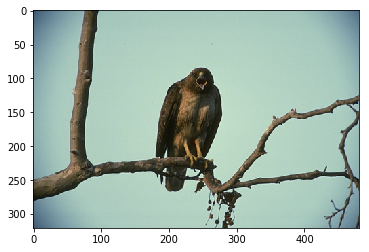

In [22]:
input_image = PATH + '/' + files[0]
display_img = Image.open(input_image)
img = display_img.convert('YCbCr')
y, cb, cr = img.split()
plt.imshow(display_image)

In [29]:
model = torch.load(model_filename)
img_to_tensor = ToTensor()
input = img_to_tensor(y).view(1, -1, y.size[1], y.size[0])

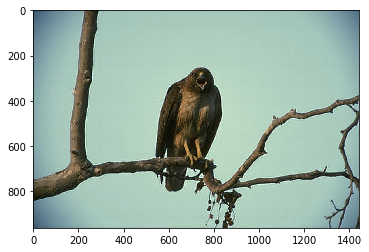

In [30]:
if use_cuda:
    model = model.cuda()
    input = input.cuda()
    
out = model(input)
out = out.cpu()
out_img_y = out[0].detach().numpy()
out_img_y *= 255.0
out_img_y = out_img_y.clip(0, 255)
out_img_y = Image.fromarray(np.uint8(out_img_y[0]), mode='L')

out_img_cb = cb.resize(out_img_y.size, Image.BICUBIC)
out_img_cr = cr.resize(out_img_y.size, Image.BICUBIC)
out_img = Image.merge('YCbCr', [out_img_y, out_img_cb, out_img_cr]).convert('RGB')
plt.imshow(out_img)

In [32]:
output_filename = "/code/out.png"
out_img.save(output_filename)
print('output image saved to ', output_filename)

output image saved to  /code/out.png
